In [1]:
# Jesse Engel, 03/12/2015
# Free to use with attribution
# Code is minimally documented, but hopefully relatively straightforward 

# Learning a parameterized encoding and decoding for a noisy channel
# s -> f -> g -> h -> shat
# s : original signal (gaussian source)
# f : encoder
# g : noisy channel (parameterized with a univariate spline)
# h : decoder
# shat : reconstructed source
# theta -> parameters of model
# x = f(s); y = g(x); shat = h(y)

#TODO: calc_grad, dfunc_dtheta, dh_dy (for n_in, n_out)
# Basically make sure the dimensions check out for the gradient

#==============================================================================
# %% Load Data
#==============================================================================
from __future__ import division
from myCode import blahut, sampling
from pylab import *
import pandas as pd
import scipy
from scipy import optimize, interpolate, stats
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
# Load actual resistance and voltage measurements

# data = pd.read_pickle('Data/PCM_20140605.pkl')
# device = 4
# R = log10(data[data.Device == device]['R'])
data = pd.read_pickle('Data/Partial_Reset_PCM.pkl')
R = log10(data['R'])
# V = data[data.Device == device]['V']
V = data['V']
V_list = np.sort(np.unique(V))

#%%
n=1000

P_RV, V_grid, R_grid = blahut.Q(V, R, nx=n, ny=n)
R_mean, R_std = blahut.moments(V, R)

1.00 Volts, 380 Points
1.05 Volts, 380 Points
1.10 Volts, 380 Points
1.15 Volts, 380 Points
1.20 Volts, 380 Points
1.25 Volts, 380 Points
1.30 Volts, 380 Points
1.35 Volts, 380 Points
1.40 Volts, 380 Points
1.45 Volts, 380 Points
1.50 Volts, 380 Points
1.55 Volts, 380 Points
1.60 Volts, 380 Points
1.65 Volts, 380 Points
1.70 Volts, 380 Points
1.75 Volts, 380 Points
1.80 Volts, 380 Points
1.85 Volts, 380 Points
1.90 Volts, 380 Points
1.95 Volts, 380 Points
2.00 Volts, 380 Points
2.05 Volts, 380 Points
2.10 Volts, 380 Points
2.15 Volts, 380 Points
2.20 Volts, 380 Points
2.25 Volts, 380 Points
2.30 Volts, 380 Points
2.35 Volts, 380 Points
2.40 Volts, 380 Points
2.45 Volts, 380 Points
2.50 Volts, 380 Points
2.55 Volts, 380 Points
2.60 Volts, 380 Points
2.65 Volts, 380 Points
2.70 Volts, 380 Points
2.75 Volts, 380 Points
2.80 Volts, 380 Points
2.85 Volts, 380 Points
2.90 Volts, 380 Points
2.95 Volts, 380 Points


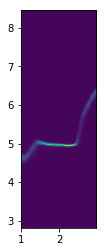

In [13]:
imshow(P_RV, extent=(V_grid.min(), V_grid.max(), R_grid.min(), R_grid.max()) )

In [14]:
#==============================================================================
# %% For each X, what V should you have to minimize d=(y-x)**2 ?
# P(R|V) -> P(y|V) -> P(d|V,x)
#==============================================================================

#Trim and flip the matrix
Rrange = (4.5, 6.4) #NOT Inverted
yidx = sampling.find_nearest(R_grid, Rrange)
xidx = np.round(linspace(0, P_RV.shape[0]-1, yidx[1]-yidx[0] ))
Pyx = P_RV[::-1][yidx[0]:yidx[1]]
Pyx = Pyx[:, xidx.astype(int)]

Pyx = P_RV
Pyx = Pyx / Pyx.sum(axis=0)

xyrange = (0, 1)
y = linspace(xyrange[0], xyrange[1], Pyx.shape[0])
x = linspace(xyrange[0], xyrange[1], Pyx.shape[1])
V_grid = linspace(V_grid.min(), V_grid.max(), Pyx.shape[0])

In [15]:
# data = pd.read_pickle('Data/PCM_20140605.pkl')
# device = 4
# R = log10(data[data.Device == device]['R'])
# V = data[data.Device == device]['V']
# V_list = np.sort(np.unique(V))

In [16]:
# Approximate density (P(y|x) = Pyx = P_RV = P(R|V)) with Gaussian Kernel and resample at 1500 locations
# The real physical quatntities R and V are scaled to x and y which span [0, 1] 
n=1500

P_RV, V_grid, R_grid = blahut.Q(V, R, nx=n, ny=n)
R_mean, R_std = blahut.moments(V, R)

#%% Trim and flip the matrix
Rrange = (4.5, 6.4) #NOT Inverted
yidx = sampling.find_nearest(R_grid, Rrange)
xidx = np.round(linspace(0, P_RV.shape[0]-1, yidx[1]-yidx[0] ))
Pyx = P_RV[::-1][yidx[0]:yidx[1]]
Pyx = Pyx[:, xidx.astype(int)]

Pyx = Pyx / Pyx.sum(axis=0)

xyrange = (0, 1)
y = linspace(xyrange[0], xyrange[1], Pyx.shape[0])
x = linspace(xyrange[0], xyrange[1], Pyx.shape[1])

1.00 Volts, 380 Points
1.05 Volts, 380 Points
1.10 Volts, 380 Points
1.15 Volts, 380 Points
1.20 Volts, 380 Points
1.25 Volts, 380 Points
1.30 Volts, 380 Points
1.35 Volts, 380 Points
1.40 Volts, 380 Points
1.45 Volts, 380 Points
1.50 Volts, 380 Points
1.55 Volts, 380 Points
1.60 Volts, 380 Points
1.65 Volts, 380 Points
1.70 Volts, 380 Points
1.75 Volts, 380 Points
1.80 Volts, 380 Points
1.85 Volts, 380 Points
1.90 Volts, 380 Points
1.95 Volts, 380 Points
2.00 Volts, 380 Points
2.05 Volts, 380 Points
2.10 Volts, 380 Points
2.15 Volts, 380 Points
2.20 Volts, 380 Points
2.25 Volts, 380 Points
2.30 Volts, 380 Points
2.35 Volts, 380 Points
2.40 Volts, 380 Points
2.45 Volts, 380 Points
2.50 Volts, 380 Points
2.55 Volts, 380 Points
2.60 Volts, 380 Points
2.65 Volts, 380 Points
2.70 Volts, 380 Points
2.75 Volts, 380 Points
2.80 Volts, 380 Points
2.85 Volts, 380 Points
2.90 Volts, 380 Points
2.95 Volts, 380 Points


In [17]:
# Approximate Pyx by a spline of the means
Pyx_mean = (Pyx*x[:, np.newaxis]).sum(axis=0)
g = interpolate.InterpolatedUnivariateSpline(x, Pyx_mean, k=3)
gprime = g.derivative(n=1)

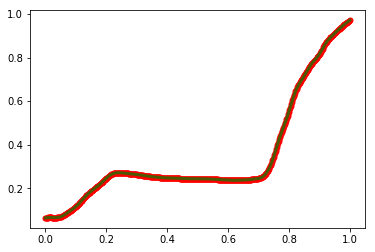

In [18]:
xs = linspace(xyrange[0], xyrange[1], Pyx.shape[1]*5)
plt.plot(x, Pyx_mean, 'ro', ms=5)
plt.plot(xs, g(xs), 'g', lw=3, alpha=0.7)

In [19]:
#==============================================================================
# %% Functions
#==============================================================================

def expand_dims(theta, n_in, n_out, one_dim):
    n = theta.size
    n_gauss = int(n / n_in / n_out)
    theta = np.reshape(theta, (n_in, n_out, n_gauss))
    f = array([[ lambda x: 0 for j in range(n_out)] for i in range(n_in)])
    for i in range(n_in):
        for j in range(n_out):
            f[i, j] = one_dim(theta[i, j, :])
    return f

def f_h(theta, n_symbols, n_devices):
    '''Given theta return f() and h()

    f and h are composed of a combination of integrals of gaussians (cdfs)
    This ensures that they are monotonically increasing and bounded
    '''
    def one_dim(theta):
        n=theta.size
        sigma0 = 1/n
        f0 = blahut.FunctionList([lambda x, k=k: 1/24 * stats.norm.cdf(x, loc=k, scale=sigma0) for k in linspace(0,1,n)])
        f = lambda x: x + f0.dot(theta)(x)
        return f 

    n = theta.size
    f = expand_dims(theta[:int(n/2)], n_symbols, n_devices, one_dim)
    h = expand_dims(theta[int(n/2):], n_devices, n_symbols, one_dim)
    return f, h

def func_dot(s, f):
    '''
    s[pts, n_in] array(float)
    f[n_in, n_out] array(funcs)
    x[pts, n_out] array(float)
    '''
    pts = s.shape[0]
    n_in = f.shape[0]
    n_out = f.shape[1]

    x = zeros([pts, n_out])
    for j in range(n_out):
        tot = zeros(pts)
        for i in range(n_in):
            tot += f[i, j](s[:,i])
        x[:, j] = tot
    return x

def g_eval(x):
    global g    
    if type(g) == scipy.interpolate.fitpack2.InterpolatedUnivariateSpline:
        n, m = x.shape
        y = g(x.ravel()).reshape(n, m)
    else:
        y = g(x)
    return y

def gprime_eval(x):
    global gprime    
    if type(gprime) == scipy.interpolate.fitpack2.UnivariateSpline:
        n, m = x.shape
        y = gprime(x.ravel()).reshape(n, m)
    else:
        y = gprime(x)
    return y


def forward(s, theta, n_devices):
    '''
    s[pts, n_symbols]
    x[pts, n_devices]
    y[pts, n_devices]
    shat[pts, n_symbols]
    '''
    global g

    pts, n_symbols = s.shape
    f, h = f_h(theta, n_symbols, n_devices)
    x = func_dot(s, f)
    y = g_eval(x)    
    shat = func_dot(y, h)
    return shat 

def calc_cost(s, theta, n_devices):
    ''' MSE cost
    '''
    shat = forward(s, theta, n_devices)
    d = (s - shat)**2
    cost = np.mean(d)
    return cost

def dfunc_dtheta(theta):
    ''' df/dtheta and dh/dtheta. Jacobian '''
    n = theta.size
    sigma0 = 1/n
    f0 = blahut.FunctionList([lambda x, k=k: 1/24 * stats.norm.cdf(x, loc=k, scale=sigma0) for k in linspace(0,1,n)])
    fprime = lambda x: f0(x)
    return fprime

def dhdy(theta):
    ''' derivative of h() (activations) '''
    n = theta.size
    sigma0 = 1/n
    f0 = blahut.FunctionList([lambda x, k=k: 1/24 * stats.norm.pdf(x, loc=k, scale=sigma0) for k in linspace(0,1,n/2)])
    fprime = lambda x: 1 + f0.dot(theta[int(n/2):])(x)
    return fprime

def calc_grad(s, theta, n_devices):
    global gprime, g
    n=theta.size
    pts, n_symbols = s.shape
    n_gauss = int(n / 2 / n_symbols / n_devices)

    dcost_dtheta_f = zeros([n_symbols, n_devices, n_gauss])
    dcost_dtheta_h = zeros([n_devices, n_symbols, n_gauss])

    f, h = f_h(theta, n_symbols, n_devices)
    x = func_dot(s, f)
    y = g_eval(x)
    shat = func_dot(y, h)

    for i in range(n_symbols):
        for j in range(n_devices):
            j = int(j)
            i = int(i)

            dcost_dshat = 2*(shat[:,i]-s[:,i]) #dcost(s)
            dshat_dy = dhdy(theta)(y[:,j]) #hprime(y)
            dy_dx = gprime(x[:,j]) #gprime(x)

            fstart = int((n_gauss*n_devices)*i + n_gauss*j)
            fend = int((n_gauss*n_devices)*i + n_gauss*(j+1))

            hstart = int((n_gauss*n_symbols)*j + n_gauss*i + n/2)
            hend = int((n_gauss*n_symbols)*j + n_gauss*(i+1) + n/2)

            print ('i:', i, 'j:', j, 'f:', fstart, fend, 'h:', hstart, hend)

            dx_dtheta = dfunc_dtheta(theta[fstart:fend])(s[:,i])
            dshat_dtheta = dfunc_dtheta(theta[hstart:hend])(y[:,j])

            # Separate costs for f() and h() variables
            dcost_dtheta_f[i,j,:] = (dcost_dshat * dshat_dy * dy_dx * dx_dtheta).mean(axis=1)
            dcost_dtheta_h[j,i,:] = (dcost_dshat * dshat_dtheta).mean(axis=1)

    dcost_dtheta = hstack([dcost_dtheta_f.ravel(), dcost_dtheta_h.ravel()])
    return dcost_dtheta

def numerical_gradient(s, theta, n_devices):
    eps = 1e-7
    grad = zeros(*theta.shape)
    dtheta = zeros(*theta.shape)
    for i in range(theta.size):
        dtheta[i] = eps
        dJ_pos = calc_cost(s, theta + dtheta, n_devices)
        dJ_neg = calc_cost(s, theta - dtheta, n_devices)
        dtheta[i] = 0
        grad[i] = (dJ_pos - dJ_neg) / (2*eps)
    return grad

def grad_check():
    n_symbols = 1
    n_devices = 1
    n_gauss = 100
    n_pts = 10
    n = n_symbols * n_devices * 2 * n_gauss
    s = rand(n_pts, n_symbols)
    theta = rand(n)
    anal_grad = calc_grad(s, theta, n_devices)
    num_grad = numerical_gradient(s, theta, n_devices)
    tot = np.mean(abs(anal_grad-num_grad))
    print (tot)
    return tot, anal_grad, num_grad

#==============================================================================
#%% Tests and Utils 
#==============================================================================

def test_f_h():
    n_in = 1; n_out = 1
    theta = hstack([linspace(0,10,10), linspace(0,3,10)])
    f, h = f_h(theta, n_in, n_out)
    x = linspace(0,1, 100)
    close('all')
    figure()
    plot(x, f[0,0](x), label='f0')
    plot(x, h[0,0](x), label='h0')

    n_in = 2; n_out = 1
    f, h = f_h(theta, n_in, n_out)
    x = linspace(0,1, 100)
    plot(x, f[0,0](x), label='f00')
    plot(x, f[1,0](x), label='f10')
    plot(x, h[0,0](x), label='h00')
    plot(x, h[0,1](x), label='h01')
    legend(loc='upper left')

    plot_f_2d(f)
    show()

def test_func_dot():
    s = arange(10).reshape(5,2)
    f = array([[ lambda x: x for j in range(1)] for i in range(2)])
    x = func_dot(s, f)
    print (s)
    print (x)

In [20]:
#==============================================================================
#%% Initial Conditions 
#==============================================================================
n_symbols = 1
n_devices = 1
n_gauss = 50
n_pts = int(1e4)
n = n_symbols * n_devices * 2 * n_gauss
# s = rand(n_pts, n_symbols)
s = 0.2*randn(n_pts, n_symbols) + 0.5
theta = randn(n)*0.1

In [25]:
#==============================================================================
#%% l-bfgs-b
# This works much better
#==============================================================================
iters = 100

def objective(theta):
    global s, n_devices
    c = calc_cost(s, theta, n_devices)
    print (c)
    return c 

def grad_obj(theta):
    global s, n_devices
    return calc_grad(s, theta, n_devices)

bnds = [(-1,1) for i in range(n)]    
options = dict(disp=2, maxiter=10, pgtol=1)

result = optimize.fmin_l_bfgs_b(func=objective,
                       x0=theta,
                       fprime=grad_obj,
                       approx_grad=False,
                       maxiter=iters,
                       maxfun=iters*10,
                       factr=1e1, 
                       epsilon=1e-1, #1e-1 for 100 worked well 
                       pgtol=1e-6,
                       bounds=bnds)

                       # args=s,

theta = result[0]

0.0887990723708
i: 0 j: 0 f: 0 50 h: 50 100


/Users/zarcone/anaconda/envs/tensorflow/lib/python3.5/site-packages/ipykernel/__main__.py:106: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


0.0887988394065
i: 0 j: 0 f: 0 50 h: 50 100
0.0887987198771
i: 0 j: 0 f: 0 50 h: 50 100
0.0887987068859
i: 0 j: 0 f: 0 50 h: 50 100
0.0887986590364
i: 0 j: 0 f: 0 50 h: 50 100
0.088798420397
i: 0 j: 0 f: 0 50 h: 50 100
0.0887981863291
i: 0 j: 0 f: 0 50 h: 50 100
0.0887976071801
i: 0 j: 0 f: 0 50 h: 50 100
0.0887967543176
i: 0 j: 0 f: 0 50 h: 50 100
0.0887963541771
i: 0 j: 0 f: 0 50 h: 50 100
0.0887953080557
i: 0 j: 0 f: 0 50 h: 50 100
0.0887951848157
i: 0 j: 0 f: 0 50 h: 50 100
0.0887949896302
i: 0 j: 0 f: 0 50 h: 50 100
0.0887947022228
i: 0 j: 0 f: 0 50 h: 50 100
0.0887938328381
i: 0 j: 0 f: 0 50 h: 50 100
0.0887933007245
i: 0 j: 0 f: 0 50 h: 50 100
0.0887928637395
i: 0 j: 0 f: 0 50 h: 50 100
0.0887924415949
i: 0 j: 0 f: 0 50 h: 50 100
0.0887914918862
i: 0 j: 0 f: 0 50 h: 50 100
0.0887904947166
i: 0 j: 0 f: 0 50 h: 50 100
0.0887902082097
i: 0 j: 0 f: 0 50 h: 50 100
0.0887897586525
i: 0 j: 0 f: 0 50 h: 50 100
0.0887897121142
i: 0 j: 0 f: 0 50 h: 50 100
0.0887896305679
i: 0 j: 0 f: 0 50

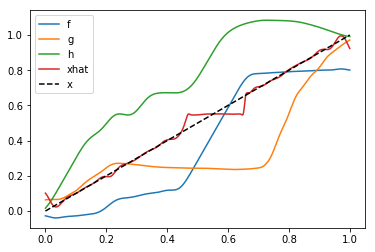

In [30]:
#==============================================================================
#%% Plotting 
#==============================================================================
#%% Plot it (1-d)

x = c_[linspace(0,1,1000)]
close('all')
f, h = f_h(theta, n_symbols, n_devices)
plot(x, f[0,0](x), label='f')
plot(x, g_eval(x), label='g')
plot(x, h[0,0](x), label='h')
xhat = forward(x, theta, n_devices)
plot(x, xhat, label='xhat')
plot(x, x, 'k--', label='x')
legend(loc='upper left')

In [ ]:
# see if Jesse's just using means 
# see how he's calculating MSE 
# check other funcs for paramters 